In [1]:
import numpy as np
print('numpy version:', np.__version__)

import pandas as pd
print('pandas version:', pd.__version__)

import matplotlib as mpl
print('matplotlib version:', mpl.__version__)
import matplotlib.pyplot as plt

import seaborn as sns
print('seaborn version:', sns.__version__)

from sklearn import (datasets, preprocessing, linear_model)
from sklearn import model_selection as ms

numpy version: 1.23.5
pandas version: 1.5.2
matplotlib version: 3.6.2
seaborn version: 0.12.1


In [2]:
cancer_data = datasets.load_breast_cancer()
y = cancer_data.target # malignant = 0, benign = 1
X = cancer_data.data
X = preprocessing.scale(X) # scale to 0-mean and unit variance

In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


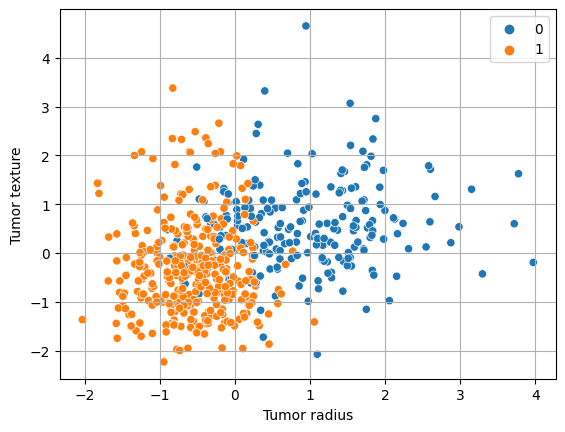

In [10]:
sns.scatterplot(data=pd.DataFrame(X), x=0, y=1, hue=pd.Series(y))
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.grid(True)

In [11]:
alpha = np.arange(1e-15, 1, 0.005)
val_scores = np.zeros((len(alpha), 1))

for i in range(len(alpha)):
    model = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha[i])
    score = ms.cross_val_score(model, X, y, cv=5)
    val_scores[i] = score.mean()

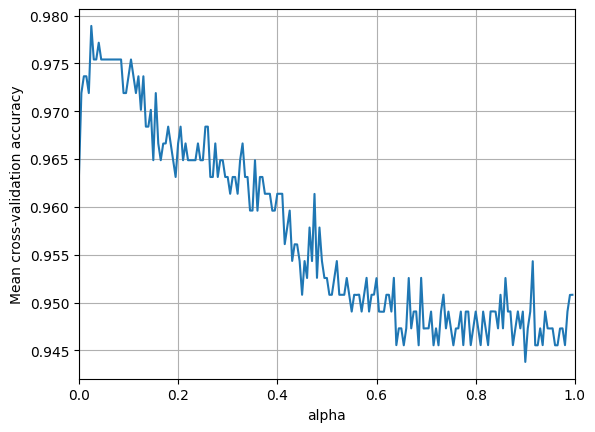

In [12]:
plt.plot(alpha, val_scores)
plt.xlim(0, 1)
plt.xlabel('alpha')
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)

Optimal alpha (regularization parameter): 0.025000000000001


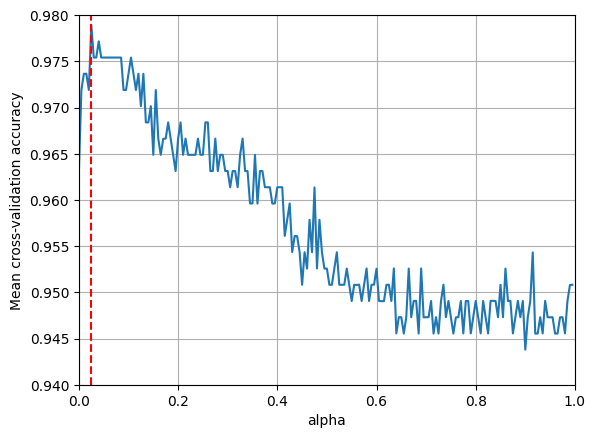

In [13]:
# looking for the best (highest) accuracy
ind = np.argmax(val_scores)
alpha_star = alpha[ind]
print('Optimal alpha (regularization parameter):', alpha_star)

plt.plot(alpha, val_scores)
plt.plot(np.ones(2)*alpha_star, [0.94, 0.98], '--r')
plt.xlim(0, 1)
plt.xlabel('alpha')
plt.ylim(0.94, 0.98)
plt.ylabel('Mean cross-validation accuracy')
plt.grid(True)

In [14]:
# train model using alpha_star
model_star = linear_model.SGDClassifier(loss='hinge', penalty='l2', alpha=alpha_star)
model_trained = model_star.fit(X, y)
print('Training accuracy:', model_trained.score(X, y))

Training accuracy: 0.9824253075571178


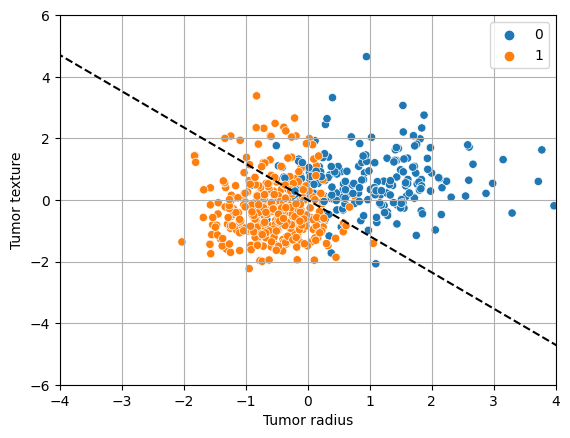

In [15]:
# plot decision boundary
slope = model_trained.coef_[0, 1] / -model_trained.coef_[0, 0]
x1 = np.arange(-10, 10, 0.5)
y1 = slope * x1
sns.scatterplot(data=pd.DataFrame(X), x=0, y=1, hue=y)
plt.plot(x1, y1, '--k')
plt.xlim(-4, 4)
plt.ylim(-6, 6)
plt.xlabel('Tumor radius')
plt.ylabel('Tumor texture')
plt.grid(True)